In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:

def read_image(filepath='./data/ustc-cow.png'):
    img = cv2.imread(filepath) # Replace with the actual path to your image
    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [8]:
class KMeans:
    def __init__(self, k=4, max_iter=10):
        self.k = k
        self.max_iter = max_iter
    

    # Randomly initialize the centers
    def initialize_centers(self, points):
        '''
        points: (n_samples, n_dims,)
        '''
        n, d = points.shape

        centers = np.zeros((self.k, d))
        for k in range(self.k):
            # use more random points to initialize centers, make kmeans more stable
            random_index = np.random.choice(n, size=10, replace=False)
            centers[k] = points[random_index].mean(axis=0)

        return centers
    

    # Assign each point to the closest center
    def assign_points(self, centers, points):
        '''
        centers: (n_clusters, n_dims,)
        points: (n_samples, n_dims,)
        return labels: (n_samples, )
        '''
        n_samples, n_dims = points.shape
        labels = np.zeros(n_samples)
        # TODO: Compute the distance between each point and each center
        # and Assign each point to the closest center

        for i in range(n_samples):
            distances = np.linalg.norm(points[i] - centers, axis=1)
            labels[i] = np.argmin(distances)

        return labels
    

    # Update the centers based on the new assignment of points
    def update_centers(self, centers, labels, points):
        '''
        centers: (n_clusters, n_dims,)
        labels: (n_samples, )
        points: (n_samples, n_dims,)
        return centers: (n_clusters, n_dims,)
        '''
        # TODO: Update the centers based on the new assignment of points

        new_centers = np.zeros_like(centers)
        for k in range(self.k):
            cluster_points = points[labels == k]
            if len(cluster_points) > 0:
                new_centers[k] = np.mean(cluster_points, axis=0)
            else:
                new_centers[k] = centers[k]

        return new_centers
    

    # k-means clustering
    def fit(self, points):
        '''
        points: (n_samples, n_dims,)
        return centers: (n_clusters, n_dims,)
        '''
        # TODO: Implement k-means clustering

        centers = self.initialize_centers(points)

        for _ in range(self.max_iter):
            labels = self.assign_points(centers, points)
            new_centers = self.update_centers(centers, labels, points)

            if np.all(centers == new_centers):
                break

            centers = new_centers

        return centers
    

    def compress(self, img):
        '''
        img: (width, height, 3)
        return compressed img: (width, height, 3)
        '''
        # Flatten the image pixels
        points = img.reshape((-1, img.shape[-1]))
        # TODO: fit the points and 
        # Replace each pixel value with its nearby center value

        centers = self.fit(points)
        compressed_points = centers[self.assign_points(centers, points).astype(int)]
        compressed_img = compressed_points.reshape(img.shape)
        
        return compressed_img

In [9]:
def comgress(img, k):
    kmeans = KMeans(k=k, max_iter=10)
    compressed_img = kmeans.compress(img).round().astype(np.uint8)

    plt.figure(figsize=(10, 10))
    plt.imshow(compressed_img)
    plt.title('Compressed Image'+str(k))
    plt.axis('off')
    plt.savefig('./output/compressed_image'+str(k)+'.png')

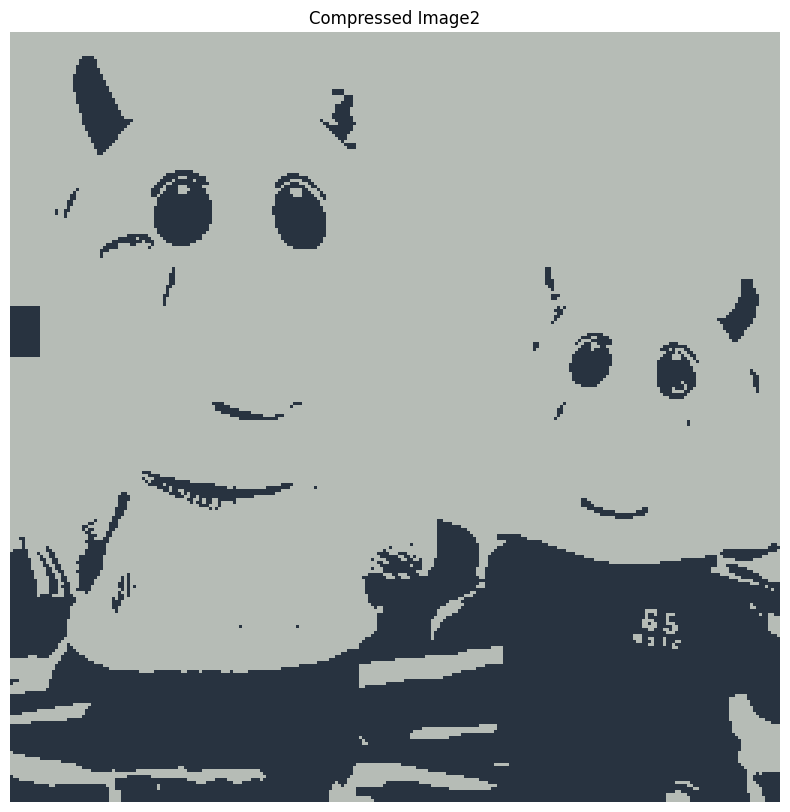

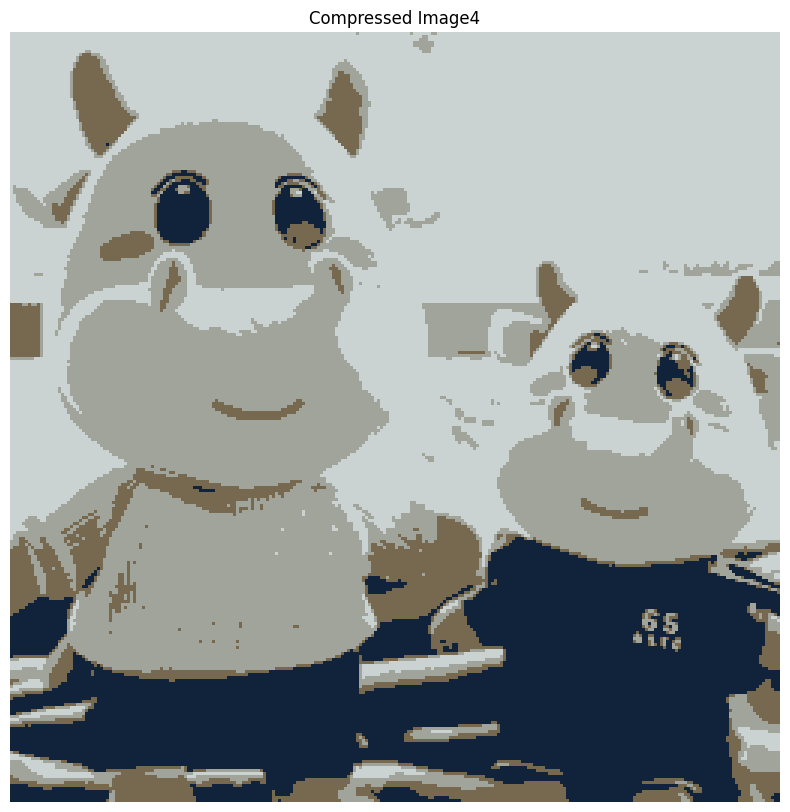

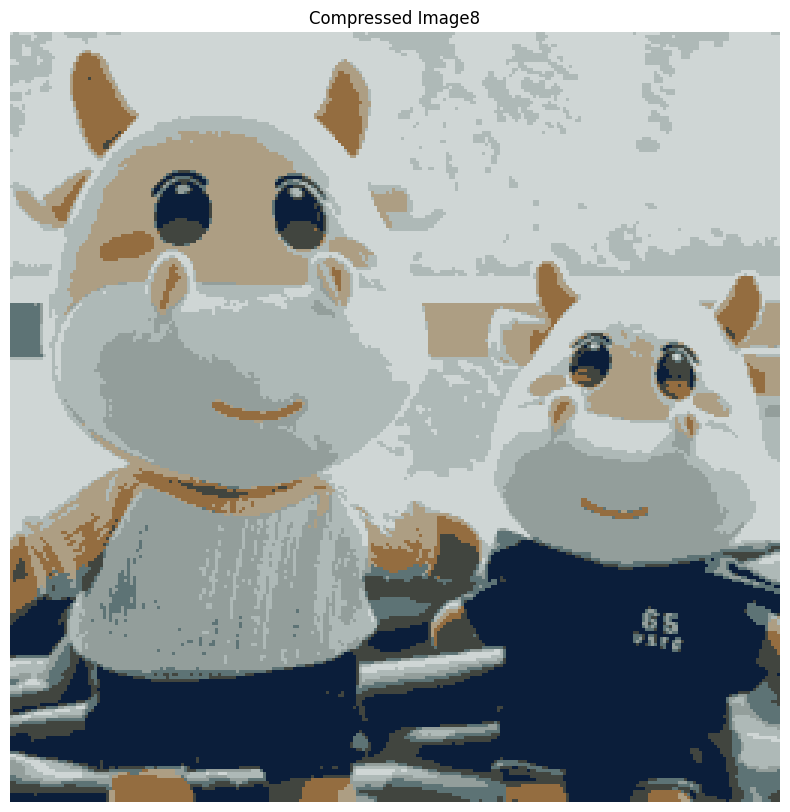

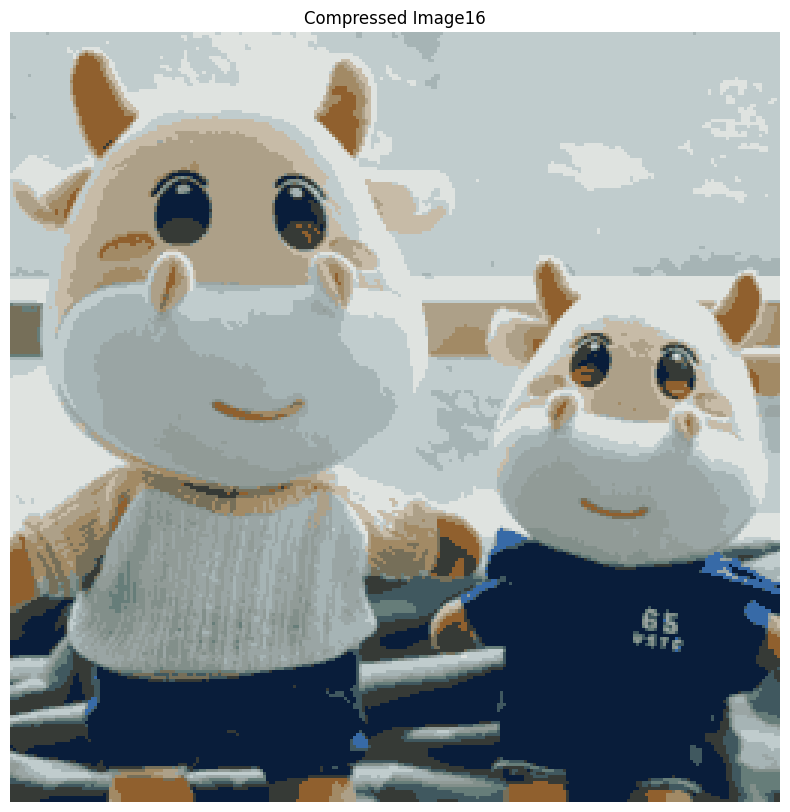

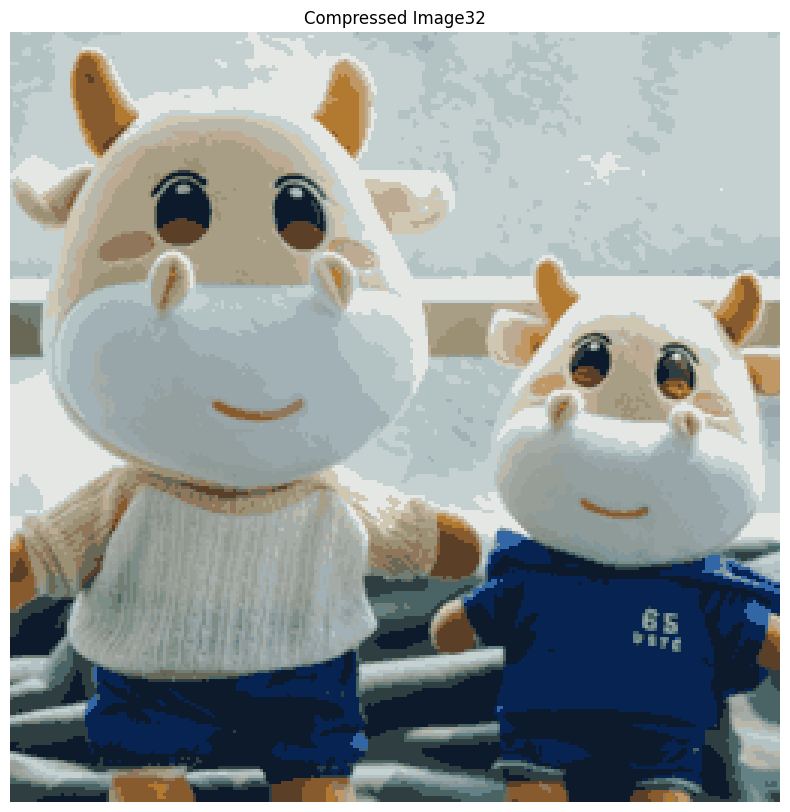

In [10]:
img = read_image(filepath='../data/ustc-cow.png')
comgress(img, 2)
comgress(img, 4)
comgress(img, 8)
comgress(img, 16)
comgress(img, 32)